In [2]:
# SHIFT + ENTER -> execute and create new cell
# dd -> delete the cell
# click on the left of cell and press a -> adds new cell above the block
# click on the left of cell and press b -> adds new cell below the block

In [3]:

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '353b9ff5-223a-4dc4-853e-825bc329d30c'
resource_group = 'rgbubble'
workspace_name = 'pikachu'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='cancerdataset')
data = dataset.to_pandas_dataframe()

In [6]:
data.tail(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
# any missing values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

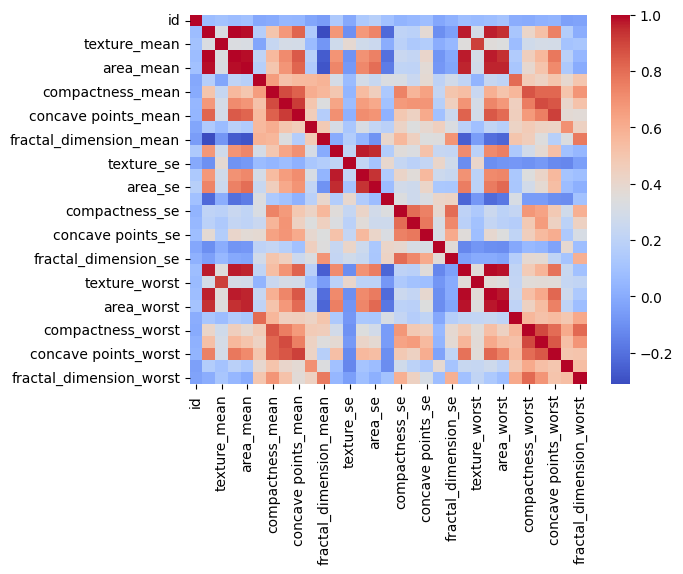

In [8]:
# CORRELATION -> if i change by tiny x, how much do you change by?
# -1 to 1-> negative, 0, positive
# -1 or negative -> if i increase, you decrease; if you increase, i decrease; Inversely Proportional 
# 1 or positive -> directly proportional; one increases, other also increases 
# 0 or ZERO or No Correlation-> whatever you do to one variable, other doesn't care!

# all values between -1 to 1! We want POS, NEG-> we DO NOT WANT 0 CORRELATIONS! 

import seaborn as sns
all_cors = data.corr()
sns.heatmap(all_cors, cmap = 'coolwarm')


In [9]:
data = data.set_index('id')


In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y = data['diagnosis']
x = data.iloc[ : , 1:] 

In [13]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)


In [15]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
921385,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134
8912284,12.89,15.70,84.08,516.6,0.07818,0.0958,0.11150,0.03390,0.1432,0.05935,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
873885,15.28,22.41,98.92,710.6,0.09057,0.1052,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.13010,0.3299,0.3630,0.12260,0.3175,0.09772
89122,19.40,18.18,127.20,1145.0,0.10370,0.1442,0.16260,0.09464,0.1893,0.05892,...,23.79,28.65,152.40,1628.0,0.15180,0.3749,0.4316,0.22520,0.3590,0.07787
886226,19.45,19.33,126.50,1169.0,0.10350,0.1188,0.13790,0.08591,0.1776,0.05647,...,25.70,24.57,163.10,1972.0,0.14970,0.3161,0.4317,0.19990,0.3379,0.08950


In [17]:
ytrain.head()


id
921385     B
8912284    B
873885     M
89122      M
886226     M
Name: diagnosis, dtype: object

In [16]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
853201,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,0.06149,...,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919
859983,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.14110,0.35420,0.27790,0.13830,0.2589,0.10300
879804,9.876,17.27,62.92,295.4,0.10890,0.07232,0.017560,0.019520,0.1934,0.06285,...,10.42,23.22,67.08,331.6,0.14150,0.12470,0.06213,0.05588,0.2989,0.07380
907367,10.030,21.28,63.19,307.3,0.08117,0.03912,0.002470,0.005159,0.1630,0.06439,...,11.11,28.94,69.92,376.3,0.11260,0.07094,0.01235,0.02579,0.2349,0.08061
914101,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028


In [18]:
ytest.head()

id
853201    M
859983    M
879804    B
907367    B
914101    B
Name: diagnosis, dtype: object

In [20]:
yencoding = { 'M': 1, 'B':0}
encoding_logic = lambda val : yencoding[val]
ytrain_encoded = ytrain.map(encoding_logic)
ytest_encoded = ytest.map(encoding_logic) # map runs a list comprehension!

In [22]:
ytest_encoded.head(5)

id
853201    1
859983    1
879804    0
907367    0
914101    0
Name: diagnosis, dtype: int64

In [24]:
# TRAIN MODEL 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain, ytrain_encoded)


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# let's look at the results 
# SCORING the model

p = model.predict(xtest)

In [27]:
# evaluation 

# compare p values with ytest values we already know!

In [29]:
p[:5]

array([1, 0, 0, 0, 0])

In [30]:
ytest_encoded[:5]

id
853201    1
859983    1
879804    0
907367    0
914101    0
Name: diagnosis, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(p, ytest_encoded)

0.9532163742690059